# PHYS 381 - Assignment #4
#### March 5, 2018
John Ming Ngo (30020834)

Kenneth Barry Sharman (00300185)

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Introduction
Euler's method is a simple algorithm that uses initial conditions to predict the state of the system at some time in the future. Consider approximating a first derivative with the following forward difference:
$$y(t_1)'=\dfrac{y(t_1)-y(t_0)}{t_1-t_0}$$
Rearranging this equation for $y(t_1)$:
$$ y(t_1)=y(t_0)+y(t_1)'(t_1-t_0) $$

Extrapolating from initial conditions; $y(t_i)$ can be determined by applying this formula in a recursive manner.

### \#1: Does the numerical solution using Euler's method conserve energy? 

To explore this approximation, we are tasked with checking the conservation of mechanical energy for an undamped simple harmonic oscillator. We know from our study in Classical Mechanics that the acceleration of the harmonic oscillator is equal to the negative product of the position and square of the angular frequency $\omega$. Since, the angular frequency can be expressed in terms of the spring constant $k$ and the mass $m$ we can establish the following relationship:

$$a = -\dfrac{k}{m}x$$

Using Euler's rule to approximate the position and velocity:
$$ x(t_1) = x(t_0) + v(t_1) * (t_1 - t_0) $$

$$ v(t_1) = v(t_0) + a(t_0) * (t_1 - t_0) $$

We will now define a function that evaluates the position, velocity, and acceleration, for a series of steps from an initial time. We must specify the initial conditions. The final parameter in the function specifies the method that is used to determine the position. This will be explained later in the writeup.

In [2]:
def eulerSpringSystem(m = 1.0, k = 1.0, x = 1.0, v = 0.0, dt = 1.0e-2, numPeriods=1.0, posMethod = 'new'):
    """
    Code based off code provided by professor, modified for ease of alteration.
    Calculates the position, velocity and acceleration for an ideal simple harmonic
    oscillator. The last parameter dictates which Euler method variation is used.
    
    Parameters:
        m: The mass connected to the spring. Default is 1.0.
        k: The spring constant. Default is 1.0.
        x: The initial position of the spring. Default is 1.0.
        v: The initial velocity of the spring. Default is 0.
        dt: The size of the timestep. Default is 1.0e-2.
        numPeriods: Time for which values are calculated over.
        
    Returns:
        np.array(x): A numpy array with the position of the mass on the spring for each time step.
        np.array(v): A numpy array with the velocity of the mass on the spring for each time step.
        np.array(a): A numpy array with the acceleration of the mass on the spring for each time step.
        np.array(t): A numpy array with the time after each time step for the above three.
        mass: Floating point number indicating the value of the mass.
        spring_constant: Floating point number indicating the value of the spring constant.
    """

    #Turn initial conditions into list form, to make the iteration step work.
    pos = [x]
    vel = [v]
    accel = [0]
    time = [0.0]
    mass = m
    spring_constant = k
    
    # Calculate Period from angular frequency
    T = np.pi*2/np.sqrt(np.abs(k/m))
    # Set the number of iterations to cover 1 specified number of periods
    numIterations = int(numPeriods*T / dt)

    #The iterating forward steps, updating time, acceleration, velocity and position.
    for n in range(numIterations):
        time.append(time[-1]+dt)
        accel.append(-k/m*pos[-1])
        vel.append(vel[-1] + accel[-1]*dt)
        
        # Three methods for calculating the position.
        if posMethod == 'new':
            pos.append(pos[-1] + vel[-1]*dt)
        elif posMethod == 'old':
            pos.append(pos[-1] + vel[-2]*dt)
        elif posMethod == 'average':
            pos.append(pos[-1] + 0.5*(vel[-1]+vel[-2])*dt)
            
    return np.array(pos), np.array(vel), np.array(accel), np.array(time), mass, spring_constant

In the absence of external forces, we expect that the total mechanical energy of the system will to be conserved. To check if this indeed the case here, there are several options such as a linear fit or the standard deviation.

To get a feel for what is going on we will simply plot a graph of the time versus the energy and see if it's constant. Alternatively we can compare the highest value to the lowest value and see how much of a difference there is.

In [11]:
def plotEnergyTimeGraph(method):
    """
    Creates a plot of total mechanical energy versus time using
    the eulerSpringSystem function
    
    Parameters:
        method: Indicates the algorithm used to determine the position.
                This value is passed as an argument to the eulerSpringSystem
                function. For details see eulerSpringSystem docstring
    Returns:
        none
    """

    # Energy at each time step.
    position, velocity, acceleration, t, m, k = eulerSpringSystem()
    energyValues = 0.5 * m * velocity**2 + 0.5 * k * position**2

    # Set the plot size
    plt.figure(figsize=(15,7))

    # Add grid with solid lines to graph
    plt.grid(linestyle='dashed')

    # Customize Plot
    plt.xlabel("Time (s)")
    plt.ylabel("Energy (J)")
    plt.title("Total Energy of Undamped Simple Harmonic Oscillator")
    plt.plot(t, energyValues, "b-")
    plt.show()

    maxEnergyDifference = np.max(energyValues) - np.min(energyValues)
    print("The maximum energy difference is: E =", maxEnergyDifference, "J")


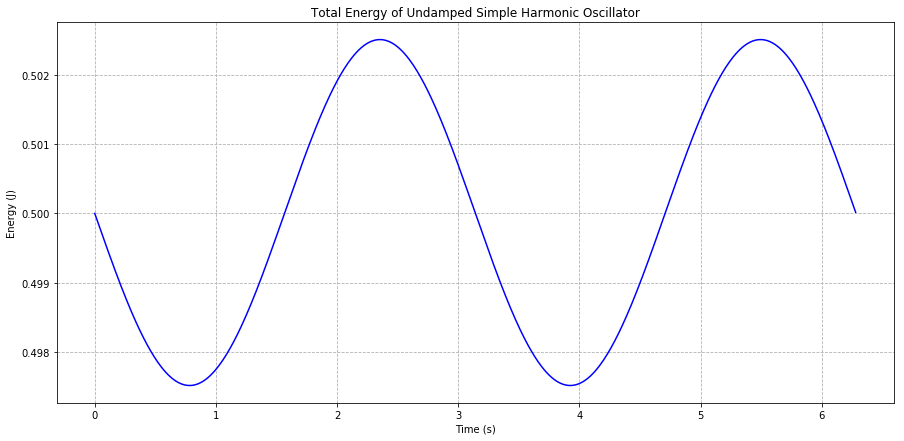

The maximum energy difference is: E = 0.005000015213861508 J


In [4]:
plotEnergyTimeGraph(eulerSpringSystem)

As can be seen from the above graph and the maximum energy difference calculation results, Euler's method as it is currently implemented does not conserve energy. Rather, the total energy seems to fluctuate in a sinusoidal fashion. The maximum energy difference is around 0.005 J, which is significantly larger than the floating point imprecision ranges, indicating that this isn't primarily due to floating-point issues. 

If we consider that the amount it fluctuates by is roughly 1% of the total energy values, and that it fluctuates around a constant value rather than going all over the place - this seems to indicate that energy is conserved within a range. If this method were to be used over a long period of time, we should also consider have to consider the long-term trend of the average value. However, if you ever need high precision, perhaps this method as it is currently implemented is not a good idea.

### Is the angular frequency correct?

We will plot the square of the angular frequency (see below) against time to check if it is constant. From our study of classical mechanics we know that for a mass and spring constant, the angular frequency is:
$$\omega = \sqrt{k \over m}$$

To determine if Euler's method is producing reliable output, we must relate the angular frequency to position, velocity, or acceleration. It can be shown:

$$\omega^2 = \dfrac{-a}{x}$$

We will calculate the angular frequency using this relationship and create a plot to understand how it is behaving. With $m=1.0 kg$ and $k=1.0 Nm^{-1}$, we expect an angular frequency of $\omega=1.0rad^2s^{-2}$.

We are going to plot $\omega^2$. It appears that our algorthim produces a few position and acceleration points that have the same sign, when the values are close to zero. This creates an error when attempting to take the square root. We believe the cause of this is based on the algorithm itself, and it may be overstepping intended values in a similar manner to what we saw in the triple integration bounds (assignment #3). There are a few ways we could deal with this issue, and have decided to plot $\omega^2$. Note that we expect the value to equal $1.0rad^{2}s^{-2}$.

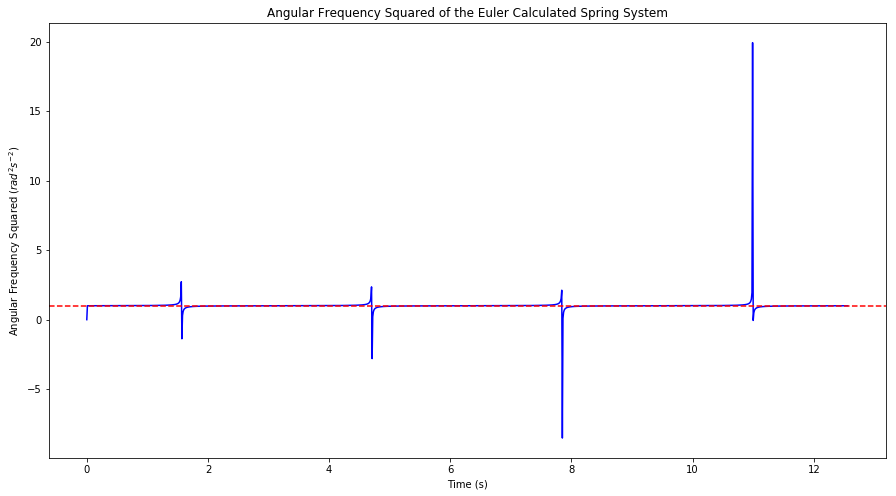

In [12]:
# Calculate position and acceleration using Euler's method
pos, vel, accel, t, m, k = eulerSpringSystem(numPeriods=2)
# Calculate the angular frequency squared. 
omega_sqr = -accel/pos

# Plot angular frequency against time
plt.figure(figsize=(15,8))
plt.plot(t, omega_sqr, "b-")
plt.xlabel("Time (s)")
plt.ylabel("Angular Frequency Squared ($rad^2s^{-2}$)")
plt.title("Angular Frequency Squared of the Euler Calculated Spring System")
plt.axhline(y=1, color='r', ls='--')

This plot shows that for the majority of the time, the angular frequency squared is relatively close to the expected value (indicated by the red line $y=1.0$). The vertical asymptotes result due to division by zero, when the position reaches the equilibrium position.

This method of determining the angular frequency produces useful results, however one must be careful to avoid using the asymptote points and/or surrounding values. This is an illustration that shows the difficulties that arise when attempting to extract information from a modelled system.

### \#2: how does the peak error in energy depend on time step? 

To determine the peak error in energy we need a reference point. This can be obtained by evaluating the initial energy, $E_0$, from the initial conditions. 

In [6]:
def initialEnergy(m = 1.0, k = 1.0, x = 1.0, v = 0.0):
    return 0.5*m*vel[0]**2 + 0.5*k*pos[0]**2

We will next determine the maximum energy value(s) for various timesteps. Plotting the peak energy error against the timestep will give a qualitative description of the relationship between these variables. Note that a logarithmic plot was used, in order to space out our data.

In [7]:
def plotEnergyErrorGraph(title, method, stepList = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]):
    '''
    Creates a logarithmic plot of the maximum energy error for a given timestep.
    
    Parameters:
        title: Plot heading
        method: parameter is passed to eulerSpringSystem as an argument. See docstring
                for eulerSpringSystem for details.
        stepList: List of timestep values
    Returns:
        none
    '''

    # Add maximum energy value(s) to a list, for each timestep
    peakE1 = []
    for step in stepList:
        x, v, a, t, m, k = eulerSpringSystem(dt=step, posMethod = method)
        E = 0.5*m*v**2 + 0.5*k*x**2
        peakE1.append( np.max( np.abs(E-initialEnergy()) ))

    # Customize Graph
    plt.figure(figsize=(15,7))
    plt.grid(linestyle='dashed')
    plt.title(title)
    plt.ylabel('Peak Error in Energy (J)')
    plt.xlabel('Time Step (s)')

    # Plot peak energy error versus timestep on a logarithmic scale 
    plt.xscale('log') 
    plt.yscale('log')
    plt.plot(stepList, peakE1, '-o')

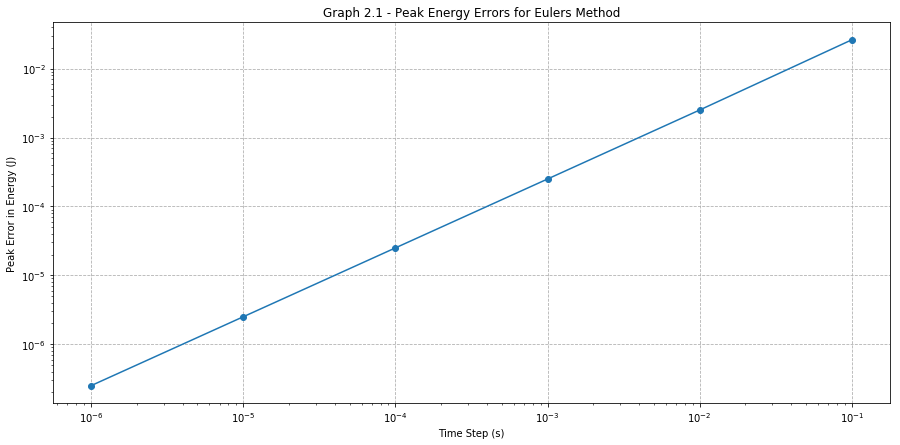

In [8]:
plotEnergyErrorGraph('Graph 2.1 - Peak Energy Errors for Eulers Method', 'new')

As we can see from the graph; as the time step size increases, the error in the fluctuation increases, and vice versa. It would seem to be the case that as the step size approaches an infinitesimally small value that the error will also approach an infinitesimally small value - perhaps as small as the floating point errors. However, reaching that level will also require progressively more iterations to generate data for the same amount of time, and thus eventually becomes prohibitively computationally expensive. Further, small differences are prone to subtractive cancelations and round off accumulation.

Thus far it seems that Euler's method is not an ideal method to approximate the equations of motion for the simple harmonic oscillator. Perhaps a slight modification to the method will better serve our purposes.

### \#3: What happens to the peak error if we step using the old velocities?
Modifying Euler's method to utilize the velocity froom the previous time step, we arrive at the following expression:

$$ x(t_1) = x(t_0) + v(t_1) * (t_1 - t_0) $$
$$ v(t_1) = v(t_0) + a(t_1) * (t_1 - t_0) $$

We will perform a similar anaylsis as above, and compare the peak errors to those previously determined using the new velocity.


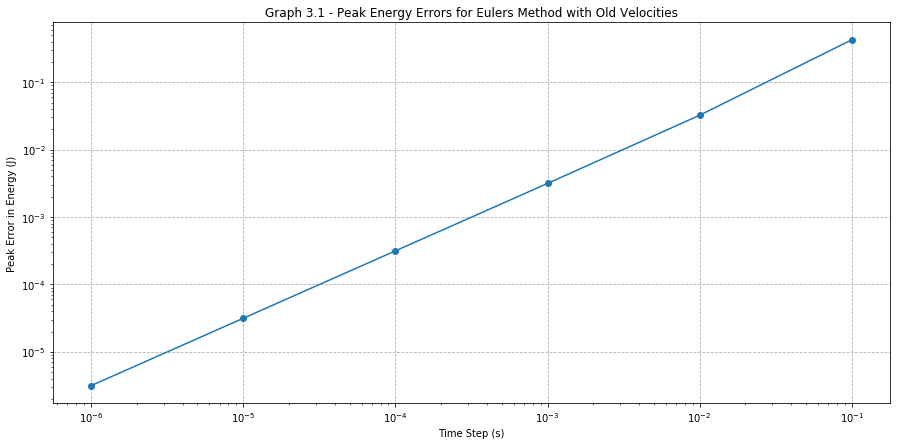

In [9]:
plotEnergyErrorGraph('Graph 3.1 - Peak Energy Errors for Eulers Method with Old Velocities', 'old')

It appears as though the peak errors in energy are roughly an order of magnitude larger than those evaluated using the new velocity method. This result is opposite our intentions, yet it illustrates that the algorithm can indeed be tweaked to provide different results. 

As a final attempt to construct an algorithm which can be effectively used to approximate the equations of motion for a SHO; we will now use the average of the new and old velocities. The analysis will again be performed in the same fashion.

### \#4: What happens to the peak error if we step using the average of old and new velocities?

Modifying Euler's method to utilize the averge of the new and old velocities;

$$ x(t_1) = x(t_0) + \frac{1}{2}[ v(t_0) + v(t_1) ] * (t_1 - t_0) $$

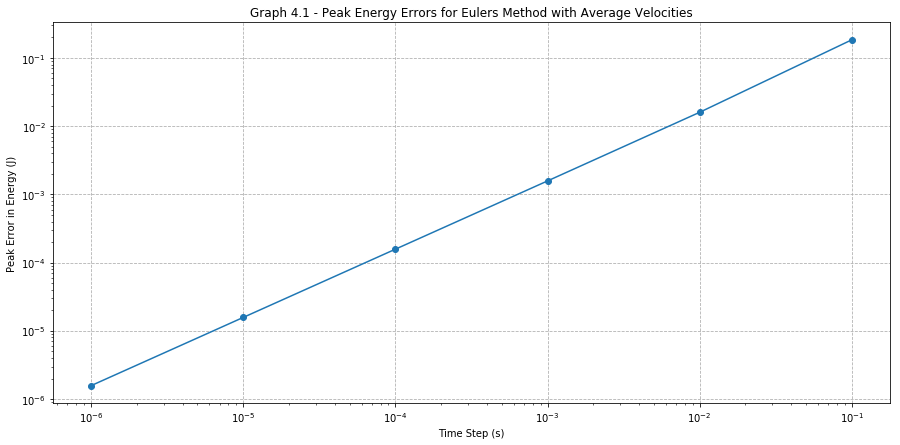

In [10]:
plotEnergyErrorGraph('Graph 4.1 - Peak Energy Errors for Eulers Method with Average Velocities', 'average')

Using the average velocity; the peak errors in energy are of the same order of magnitude as the new velocity method. It appears that our efforts have made no change to the fact that the peak error in energy increases as the time step increases.

## Conclusion
Error is the first thing that comes to mind when integrating differential equations using numerical methods because derivatives require small differences which are prone to subtractive cancelations and round off accumulation. Using Euler's method, we were able to analyze the total energy and angular frequency of a simple harmonic oscillator. In both cases, there were small deviations from our expectations of the ideal system. Further, we determined that the peak energy error increases for larger time steps. Thus, it is a lose-lose situation. We want larger step sizes, to reduce the subtractive and round off errors, however this increases the deviations from expectations.

Heading into this assignment the thoery of Euler's method gave the impression that we would be able to produce results within a certain error range, simply by making the timestep small enough. After the first version of this assignment, we concluded that Euler's method was not recommended for general use since we were not able to minimize the errors. After some discussion of the results, we realized possible benefits of this method. It is an excellent tool that can be used with initial conditions to initiate the extrapolation process. Further, it is expected to perform quite well in situations where the function is relatively flat- larger step sizes can be used, as the function value changes less over this interval.
We can conclude that there is a time and a place, in which the use of Euler's method is appropriate.